In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 44.4MB/s]


In [2]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('housing.csv')
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [5]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df_shuffled = df.sample( n= len(df) , random_state=1)
df_shuffled


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


FIRST CONVERT OCEAN PROXIMITY INTO SOMEHTING USEFUL

In [7]:
dummy = pd.get_dummies(df_shuffled['ocean_proximity']).astype(int)

In [8]:
drop = df_shuffled.drop("ocean_proximity" , axis = 1)

In [9]:
# NOW WE WILL JOIN BOTH THE COLOUM THE ONE WITH DUMMY VARIABLE AND ONE WITH NO OCEAN PROXIMITY
df_final = pd.concat([dummy , drop] , axis =1)
df_final

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,1,0,0,0,0,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,0,1,0,0,0,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,0,0,0,1,0,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,0,0,0,1,0,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,1,0,0,0,0,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1,0,0,0,0,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0
17289,1,0,0,0,0,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0
5192,1,0,0,0,0,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0
12172,0,1,0,0,0,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0


In [10]:
# PUTTING TARGET VALUES AT THR LAST COLUMN
df_final.columns

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')

In [11]:
# reordering the columns
df_final = df_final[['longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',  'median_house_value']]
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [12]:
null_values = df_final.isnull().sum()
print(null_values)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64


In [13]:
df_final = df_final.dropna()
len(df_final)


20433

In [14]:
train_pd , test_pd , val_pd = df_final[:18000] , df_final[18000: 19215] , df_final[19215:]
len(train_pd), len(test_pd) ,len(val_pd)

(18000, 1215, 1218)

In [15]:
x_train , y_train = train_pd.to_numpy()[:, : -1] , train_pd.to_numpy()[:,-1]
# Xtrain contains everything except the last column and Ytrain contains only the last columns
x_train
x_train.shape


(18000, 13)

In [16]:
y_train
y_train.shape

(18000,)

In [17]:
x_test , y_test = test_pd.to_numpy()[:, : -1] , test_pd.to_numpy()[:,-1]
x_val , y_val = val_pd.to_numpy()[:, : -1] , val_pd.to_numpy()[:,-1]


x_val.shape , y_val.shape ,  x_test.shape , y_test.shape


((1218, 13), (1218,), (1215, 13), (1215,))

In [18]:
# this will standardised all the row so it will help our algo to not treat a particular feature as a highly impactful

from sklearn.preprocessing import StandardScaler

# this will standardised the data it will find the avg value subtract by original and divide by standard deviation this will be done for all the column for all test train and validaiton
# This is not done for categorical variable
import numpy as np
scaler = StandardScaler().fit(x_train[:,:8]) #upto first 7 column

def preprocessor(X):
  A = np.copy(X)
  A[:,:8] = scaler.transform(A[:,: 8])
  return A

x_train, x_val , x_test = preprocessor(x_train) , preprocessor(x_val) , preprocessor(x_test)
x_train


array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


In [20]:
# for i in range (13):
#   pd.DataFrame(x_train_preprocessed)[i].hist()

<Axes: >

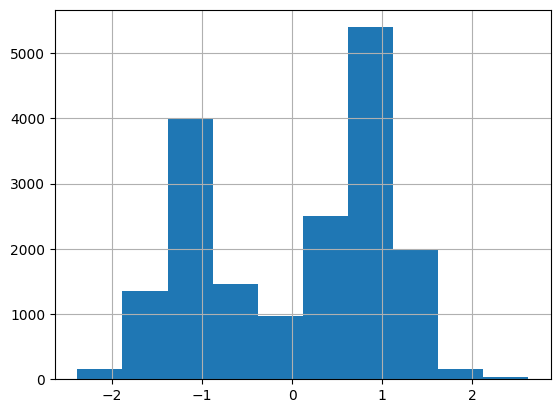

In [21]:
pd.DataFrame(x_train)[0].hist()

<Axes: >

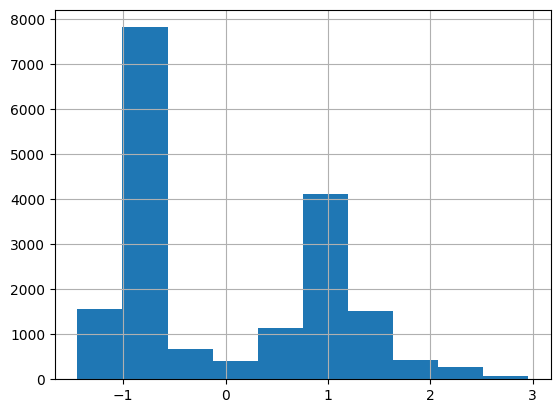

In [22]:
pd.DataFrame(x_train)[1].hist()

In [23]:
#EVERYONE WILL BE BETWEEN -3 and +3

In [24]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


In [25]:
# Mean Sq Error: sum((y_hat(x) - y)^2) / 2*m
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression


In [26]:
lm = LinearRegression().fit(x_train , y_train) #asking to draw a line thru inputs and outputs
mse(lm.predict(x_train) , y_train , squared = False)  #comparing mse with x_train and y_train and getting its sqaured root


68593.05578127236

In [27]:
mse(lm.predict(x_val) , y_val , squared = False)

71382.43558330165

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(x_train , y_train)
mse(knn.predict(x_train) , y_train , squared = False) , mse(knn.predict(x_val) , y_val , squared = False)
# our aim is to bring the train and validation error closer change value of n accordingly

(53759.09908812057, 62161.22860469906)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(x_train , y_train)
mse(rfr.predict(x_train) , y_train , squared = False) , mse(rfr.predict(x_val) , y_val , squared = False)
# resutls are very close so almost no overfitting
# for max_depth =2 we'll get values aroung 80 which are far from error in knn and mse


(43656.97331212192, 53467.52173350139)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(x_train , y_train)
mse(gbr.predict(x_train) , y_train , squared = False) , mse(gbr.predict(x_val) , y_val , squared = False)

(47274.82259072157, 51352.86174413144)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * #this will import all the layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint #saving the model after each epoc
from tensorflow.keras.metrics import RootMeanSquaredError
simple_nn = Sequential([
    InputLayer(input_shape=(13,)),  # Input layer with 13 features
    Dense(2, activation='relu'),    # First hidden layer with 2 neurons and ReLU activation
    Dense(1, activation='linear')   # Output layer with 1 neuron and linear activation
])

# Compile the model
opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Fit the model
simple_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)


Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 50742587392.0000 - root_mean_squared_error: 225261.1562 - val_loss: 41211830272.0000 - val_root_mean_squared_error: 203006.9688
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 31057209344.0000 - root_mean_squared_error: 176230.5625 - val_loss: 23783995392.0000 - val_root_mean_squared_error: 154220.6094
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 18951989248.0000 - root_mean_squared_error: 137666.2188 - val_loss: 13713936384.0000 - val_root_mean_squared_error: 117106.5156
Epoch 4/100
563/563 [==============================] - 3s 5ms/step - loss: 8891184128.0000 - root_mean_squared_error: 94293.0781 - val_loss: 5584075264.0000 - val_root_mean_squared_error: 74726.6719
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 5158375424.0000 - root_mean_squared_error: 71821.8281 - val_loss: 5220760576.0000 - val_root_mean_squared_error: 7225

In [32]:
from tensorflow.keras.models import load_model #saving the model
model = load_model('models/simple_nn')
mse(model.predict(x_train) , y_train , squared = False) , mse(model.predict(x_val) , y_val , squared = False)

39/39 [==============================] - 0s 1ms/step


(65931.01905401725, 68460.83838955144)